# Image Processing CookBook
## Chapter 7
### Author - Sandipan Dey

### Image Classification with scikit-learn (HOG + SVM)

In [ ]:
# http://www.vision.caltech.edu/Image_Datasets/Caltech101/

import numpy as np # linear algebra
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score

# TODO

### Image Classification with VGG-19 / Inception V3 / MobileNet / ResNet101 (with deep learning, pytorch)

['AlexNet', 'DenseNet', 'GoogLeNet', 'Inception3', 'MNASNet', 'MobileNetV2', 'ResNet', 'ShuffleNetV2', 'SqueezeNet', 'VGG', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_utils', 'alexnet', 'densenet', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'detection', 'googlenet', 'inception', 'inception_v3', 'mnasnet', 'mnasnet0_5', 'mnasnet0_75', 'mnasnet1_0', 'mnasnet1_3', 'mobilenet', 'mobilenet_v2', 'resnet', 'resnet101', 'resnet152', 'resnet18', 'resnet34', 'resnet50', 'resnext101_32x8d', 'resnext50_32x4d', 'segmentation', 'shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'shufflenet_v2_x1_5', 'shufflenet_v2_x2_0', 'shufflenetv2', 'squeezenet', 'squeezenet1_0', 'squeezenet1_1', 'utils', 'vgg', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn', 'video', 'wide_resnet101_2', 'wide_resnet50_2']
cheetah 99.89791870117188
cheetah 91.21218872070312
cheetah 99.99945068359375
cheetah 

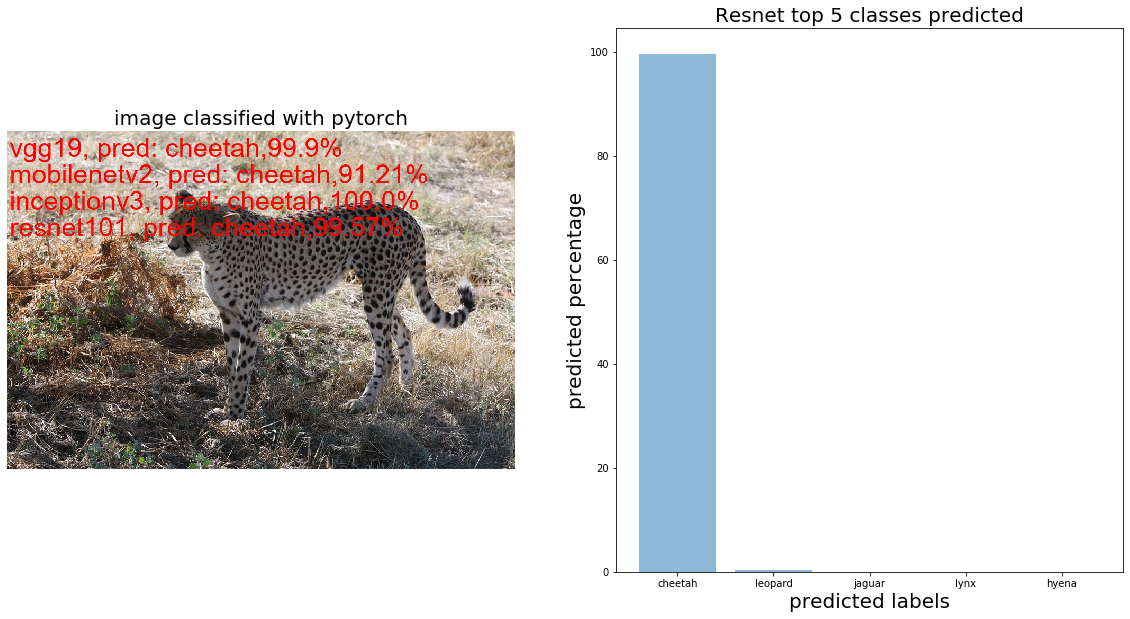

goose 98.00643157958984
American_egret 47.181419372558594
goose 70.42166900634766
goose 95.96502685546875


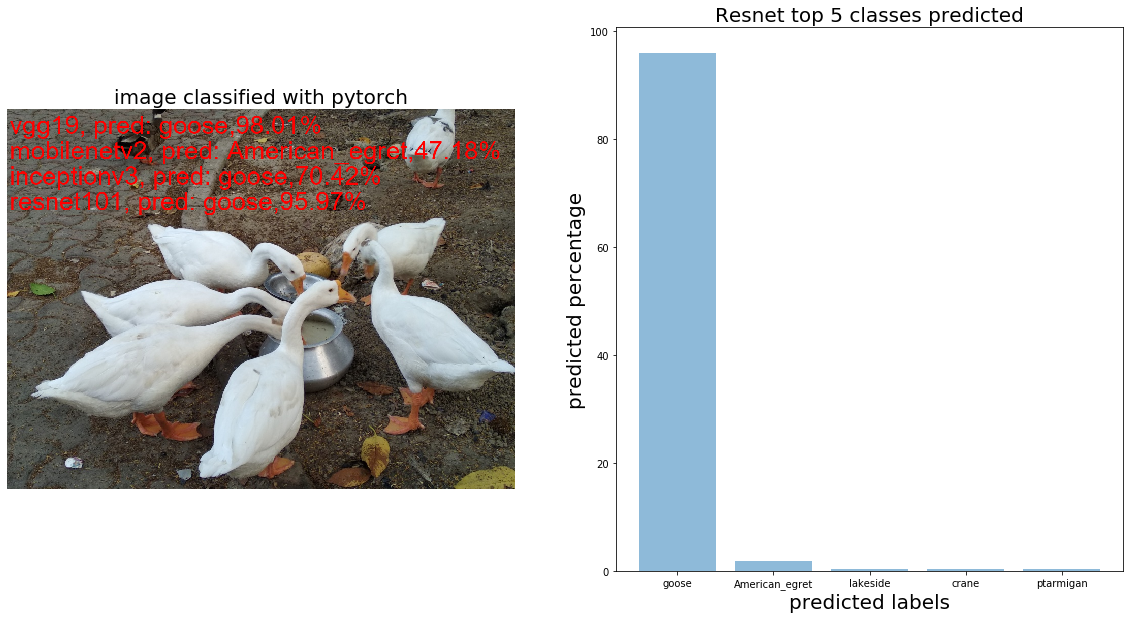

In [80]:
%matplotlib inline
import torch
from torchvision import models, transforms
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pylab as plt

def classify(img, model_index, model_name, model_pred, labels):
    #print(model_name, model_pred.shape)
    _, index = torch.max(model_pred, 1)
    model_pred, indices = torch.sort(model_pred, dim=1, descending=True)
    percentage = torch.nn.functional.softmax(model_pred, dim=1)[0] * 100
    print(labels[index[0]], percentage[0].item())
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype(r'arial.ttf', 50)
    draw.text((5, 5+model_index*50),'{}, pred: {},{}%'.format(model_name, labels[index[0]], round(percentage[0].item(),2)),(255,0,0),font=font)
    return indices, percentage

with open('models/imagenet_classes.txt') as f:
  labels = [line.strip() for line in f.readlines()]

    
print(dir(models))

transform = transforms.Compose([            
 transforms.Resize(256),                    
 transforms.CenterCrop(224),                
 transforms.ToTensor(),                     
 transforms.Normalize(                      
 mean=[0.485, 0.456, 0.406],                
 std=[0.229, 0.224, 0.225]                  
 )])

for imgfile in ["images/cheetah.png", "images/swan.png"]:
    
    img = Image.open(imgfile).convert('RGB')
    img_t = transform(img)
    batch_t = torch.unsqueeze(img_t, 0)

    vgg19 = models.vgg19(pretrained=True)
    vgg19.eval()
    pred = vgg19(batch_t)
    classify(img, 0, 'vgg19', pred, labels)

    mobilenetv2 = models.mobilenet_v2(pretrained=True)
    mobilenetv2.eval()
    pred = mobilenetv2(batch_t)
    classify(img, 1, 'mobilenetv2', pred, labels)

    inceptionv3 = models.inception_v3(pretrained=True)
    inceptionv3.eval()
    pred = inceptionv3(batch_t)
    classify(img, 2, 'inceptionv3', pred, labels)

    resnet101 = models.resnet101(pretrained=True)
    resnet101.eval()
    pred = resnet101(batch_t)
    indices, percentages = classify(img, 3, 'resnet101', pred, labels)
    
    plt.figure(figsize=(20,10))
    plt.subplot(121), plt.imshow(img), plt.axis('off'), plt.title('image classified with pytorch', size=20)
    plt.subplot(122), plt.bar(range(5), percentages.detach().numpy()[:5], align='center', alpha=0.5)
    #print(indices[0].detach().numpy()[:5])
    plt.xticks(range(5),  np.array(labels)[indices.detach().numpy().astype(int)[0][:5]])
    plt.xlabel('predicted labels', size=20), plt.ylabel('predicted percentage', size=20)
    plt.title('Resnet top 5 classes predicted', size=20)
    plt.show()

### Traffic Signal Classification with deep learning

In [ ]:
#!mkdir traffic_signs
import os, glob
from shutil import copy
import pandas as pd

image_dir = 'GTSRB/Final_Training/Images/'
dest_dir = 'traffic_signs'
df = pd.DataFrame()
for d in sorted(os.listdir(image_dir)):
    #print(d)
    images = sorted(glob.glob(os.path.join(image_dir, d, '*.ppm')))
    for img in images:
        copy(img, dest_dir)
    for csv in sorted(glob.glob(os.path.join(image_dir, d, '*.csv'))):
        df1 = pd.read_csv(csv, sep=';')
        df = df.append(df1)
        #print(df.head())
        print(d, len(images), df1.shape)
df.to_csv(os.path.join(dest_dir, 'labels.csv'))

In [2]:
df.head()

Filename  Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId
0  00000_00000.ppm     29      30       5       6      24      25        0
1  00000_00001.ppm     30      30       5       5      25      25        0
2  00000_00002.ppm     30      30       5       5      25      25        0
3  00000_00003.ppm     31      31       5       5      26      26        0
4  00000_00004.ppm     30      32       5       6      25      26        0

In [4]:
df.shape

(39209, 8)

In [10]:
len(glob.glob(os.path.join(dest_dir, '*.ppm')))

2250

In [ ]:
import pandas as  pd
signal_names =  pd.read_csv('signal_names.csv')
signal_names.head()

(34799, 32, 32, 3) (4410, 32, 32, 3) (12630, 32, 32, 3) 43


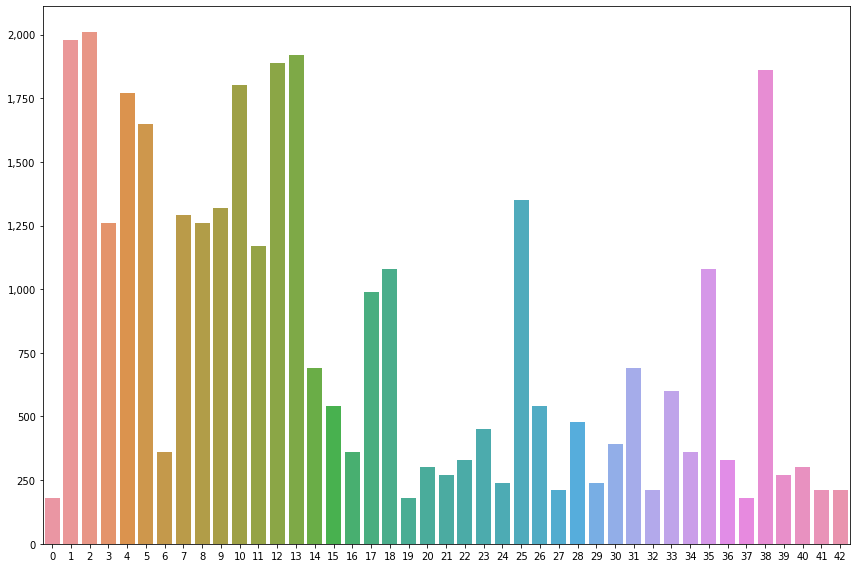

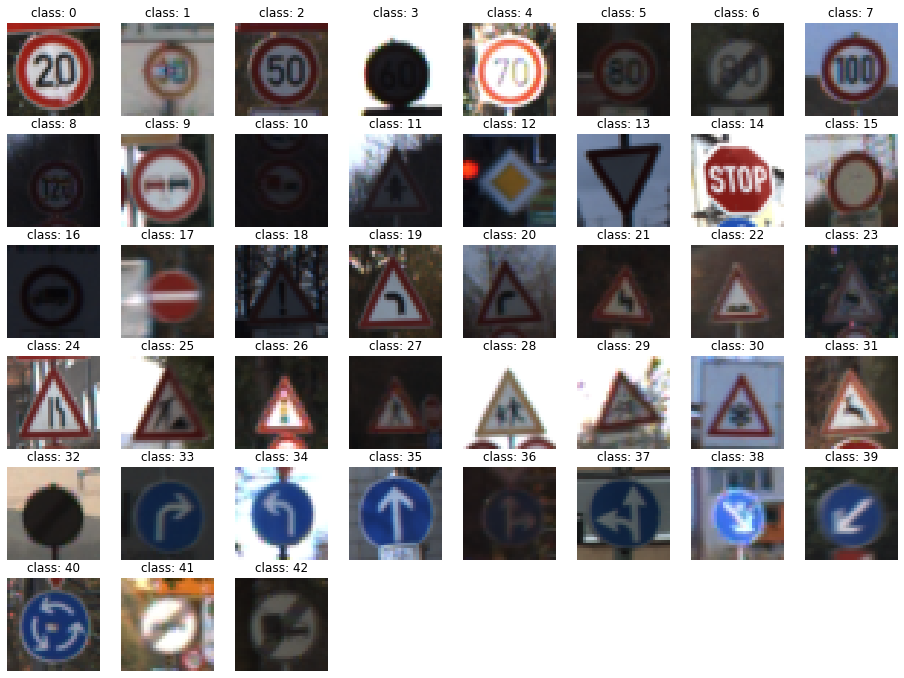

In [3]:
%matplotlib inline
import pickle
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

training_file = "traffic_signs/train.p"
validation_file = "traffic_signs/valid.p"
testing_file = "traffic_signs/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
n_signs = len(np.unique(y_train))

print(X_train.shape, X_valid.shape, X_test.shape, n_signs)

plt.figure(figsize=(12,8))
# plot barh chart with index as x values
ax = sns.barplot(list(range(n_signs)), np.bincount(y_train))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.tight_layout()
plt.show()


plt.figure(figsize=(20, 20))
for c in range(n_signs):
    i = np.random.choice(np.where(y_train == c)[0])
    plt.subplot(8, 6, c+1)
    plt.axis('off')
    plt.title(signal_names.loc[signal_names['ClassId'] == c].SignName.to_string(index=False))
    plt.imshow(X_train[i])

In [ ]:
import cv2 
import torch
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import torch.utils.data.sampler as sampler
from torch import nn, optim
from livelossplot import PlotLosses
import torch.nn.functional as F
import os

class TraffficNet(nn.Module):
    def __init__(self, gray=False):
        super(TraffficNet, self).__init__()
        input_chan = 1 if gray else 3
        self.conv1 = nn.Conv2d(input_chan, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 43)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
class ClaheTranform:
    def __init__(self, clipLimit=2.5, tileGridSize=(4, 4)):
        self.clipLimit = clipLimit
        self.tileGridSize = tileGridSize

    def __call__(self, im):
        img_y = cv2.cvtColor(im, cv2.COLOR_RGB2YCrCb)[:,:,0]
        clahe = cv2.createCLAHE(clipLimit=self.clipLimit, tileGridSize=self.tileGridSize)
        img_y = clahe.apply(img_y)
        img_output = img_y.reshape(img_y.shape + (1,))
        return img_output

class PickledTrafficSignsDataset(Dataset):
    def __init__(self, file_path, transform=None):
        with open(file_path, mode='rb') as f:
            data = pickle.load(f)
            self.features = data['features']
            self.labels = data['labels']
            self.count = len(self.labels)
            self.transform = transform
        
    def __getitem__(self, index):
        feature = self.features[index]
        if self.transform is not None:
            feature = self.transform(feature)
        return (feature, self.labels[index])

    def __len__(self):
        return self.count

def train(model, device):
    data_transforms = transforms.Compose([
        ClaheTranform(),
        transforms.ToTensor()
    ])
    torch.manual_seed(1)
    train_dataset = PickledTrafficSignsDataset(training_file, transform=data_transforms)
    valid_dataset = PickledTrafficSignsDataset(validation_file, transform=data_transforms)
    test_dataset = PickledTrafficSignsDataset(testing_file, transform=data_transforms)
    class_sample_count = np.bincount(train_dataset.labels)
    weights = 1 / np.array([class_sample_count[y] for y in train_dataset.labels])
    samp = sampler.WeightedRandomSampler(weights, 43 * 2000)
    train_loader = DataLoader(train_dataset, batch_size=64, sampler=samp)
    #train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
    optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.7)
    train_epochs(model, device, train_loader, valid_loader, optimizer)

def train_epochs(model, device, train_data_loader, valid_data_loader, optimizer):
    
    liveloss = PlotLosses()
    loss_function = nn.CrossEntropyLoss()
    running_loss = 0.0
    running_corrects = 0
    data_loaders = {'train': train_data_loader, 'validation':valid_data_loader}
    
    for epoch in range(20):
        logs = {}
        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
                
            running_loss = 0.0
            running_corrects = 0
            total = 0

            for batch_idx, (data, target) in enumerate(data_loaders[phase]):
                
                if phase == 'train':
                    output = model(data.to(device))
                    target = target.long().to(device)
                    loss = loss_function(output, target)
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                else:
                    with torch.no_grad():
                        output = model(data.to(device))
                        target = target.long().to(device)
                        loss = loss_function(output, target)

                if batch_idx % 100 == 0:
                    print('Train Epoch: {} [{}/{} ({:.0f}%)]\t{} Loss: {:.6f}'.format(
                        epoch, batch_idx * len(data), len(data_loaders[phase].dataset),
                        100. * batch_idx / len(data_loaders[phase]), phase, loss.item()))
                
                pred = torch.argmax(output, dim=1)
                running_loss += loss.detach()
                running_corrects += torch.sum(pred == target).sum().item() 
                total += target.size(0)


            epoch_loss = running_loss / len(data_loaders[phase].dataset)
            epoch_acc = running_corrects / total
            
            prefix = ''
            if phase == 'validation':
                prefix = 'val_'

            logs[prefix + 'log loss'] = epoch_loss.item()
            logs[prefix + 'accuracy'] = epoch_acc#.item()
        
        liveloss.update(logs)
        liveloss.draw()

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TraffficNet(True).to(device)
model.share_memory() # gradients are allocated lazily, so they are not shared here
train(model, device)

![](images/traffic_learning.png)

In [ ]:
data_transforms = transforms.Compose([
        ClaheTranform(),
        transforms.ToTensor()
])
test_dataset = PickledTrafficSignsDataset(testing_file, transform=data_transforms)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
for (batch_idx, data) in enumerate(test_loader):
    with torch.no_grad():
        output = model(data[0].to(device))
        pred = torch.argmax(output, dim=1)
        break
        
plt.figure(figsize=(20, 20))
for i in range(len(pred)):
    plt.subplot(11, 6, i+1)
    plt.axis('off')
    plt.title(signal_names.loc[signal_names['ClassId'] == pred[i].cpu().numpy()].SignName.to_string(index=False))
    plt.imshow(np.reshape(data[0][i,...].cpu().numpy(), (-1,32)), cmap='gray')
plt.show()

![](images/traffic_sign_test_pred.png)

### Human pose estimation using Deep Learning

In [87]:
%matplotlib inline
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from torch.utils import data

proto_file = "models/pose_deploy_linevec_faster_4_stages.prototxt"
weights_file = "models/pose_iter_160000.caffemodel"
n_points = 15
BODY_PARTS = {"Head": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4, 
              "LShoulder": 5,  "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
             "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Chest": 14, "Background": 15}

#POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]
POSE_PAIRS = [ ["Head", "Neck"], ["Neck", "RShoulder"], ["RShoulder", "RElbow"],
             ["RElbow", "RWrist"], ["Neck", "LShoulder"], ["LShoulder", "LElbow"],
             ["LElbow", "LWrist"], ["Neck", "Chest"], ["Chest", "RHip"], ["RHip", "RKnee"],
             ["RKnee", "RAnkle"], ["Chest", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"] ]


image = cv2.imread("images/leander.png")
height, width = image.shape[:2]
threshold = 0.1

net = cv2.dnn.readNetFromCaffe(proto_file, weights_file)
blob = cv2.dnn.blobFromImage(image, 1.0 / 255, (368,368), (0, 0, 0), swapRB=False, crop=False)
net.setInput(blob)
output = net.forward()
h, w = output.shape[2:4]
print(output.shape)

(1, 44, 46, 46)


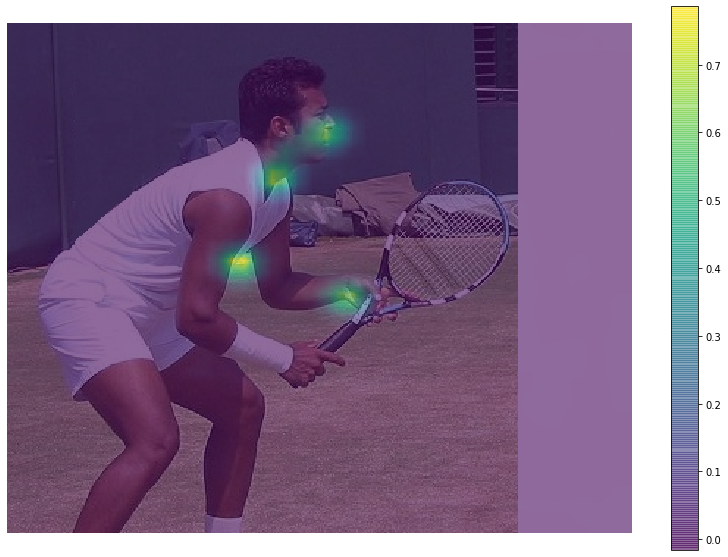

In [88]:
plt.figure(figsize=[14,10])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
prob_map = np.zeros((width, height))
for i in range(1,5):
    pmap = output[0, i, :, :]
    prob_map += cv2.resize(pmap, (height, width))
plt.imshow(prob_map, alpha=0.6)
plt.colorbar()
plt.axis("off")
plt.show()

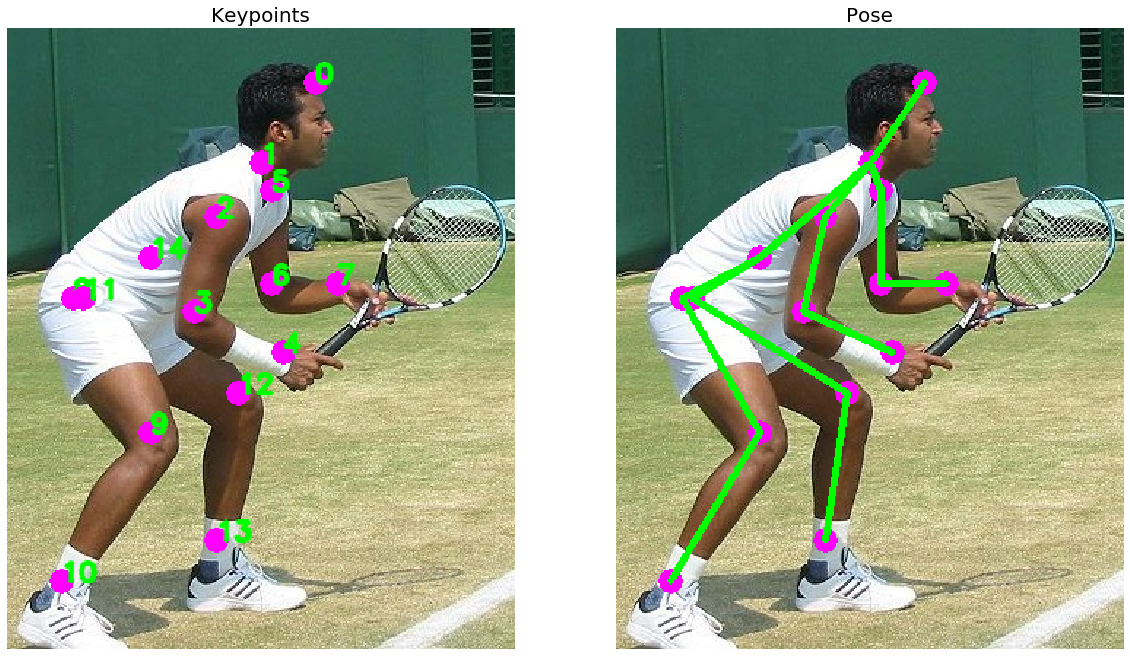

In [89]:
image1 = image.copy()

# Empty list to store the detected keypoints
points = []

for i in range(n_points):
    # confidence map of corresponding body's part.
    prob_map = output[0, i, :, :]

    # Find local maxima of the prob_map.
    min_val, prob, min_loc, point = cv2.minMaxLoc(prob_map)
    
    # Scale the point to fit on the original image
    x = (width * point[0]) / w
    y = (height * point[1]) / h

    if prob > threshold : 
        cv2.circle(image1, (int(x), int(y)), 8, (255, 0, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(image1, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2, lineType=cv2.LINE_AA)
        cv2.circle(image, (int(x), int(y)), 8, (255, 0, 255), thickness=-1, lineType=cv2.FILLED)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)

# Draw Skeleton
for pair in POSE_PAIRS:
    part_from = BODY_PARTS[pair[0]]
    part_to = BODY_PARTS[pair[1]]

    if points[part_from] and points[part_to]:
        cv2.line(image, points[part_from], points[part_to], (0, 255, 0), 3)

plt.figure(figsize=[20,12])
plt.subplot(121), plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Keypoints', size=20)
plt.subplot(122), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Pose', size=20)
plt.show()

In [ ]:
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import load_img
import matplotlib.pylab as plt
import numpy as np

train_dir = 'images2/flower_photos/train'
validation_dir = 'images2/flower_photos/valid'
image_size = 224

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

# No Data augmentation 
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

# Save the Model
model.save('all_freezed.h5')

# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

In [ ]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, wspace=0.05, hspace=0)
plt.subplot(121)
plt.grid()
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.legend(prop={'size': 15})
plt.subplot(122)
plt.grid()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.legend(prop={'size': 15})
plt.show()

![](images/transfer_out1.png)

In [ ]:
# Get the filenames from the generator
fnames = validation_generator.filenames

# Get the ground truth from generator
ground_truth = validation_generator.classes

# Get the label to class mapping from the generator
label2index = validation_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))


# Show the errors
plt.figure(figsize=[20,20])
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, wspace=0.05, hspace=0)
for i in range(len(errors[:16])):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
    
    title = 'Original label:{}\n Prediction: {} confidence: {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class], size=20)
    
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
plt.show()

![](images/transfer_out2.png)

### Image Classification with Fine Tuning

In [8]:
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import load_img
import matplotlib.pylab as plt
import numpy as np

train_dir = 'images/flower_photos/train'
validation_dir = 'images/flower_photos/valid'
image_size = 224

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:-2]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

# No Data augmentation 
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

# Save the Model
model.save('all_freezed.h5')

# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

<keras.engine.input_layer.InputLayer object at 0x7f10b1ca7b38> False
<keras.layers.convolutional.Conv2D object at 0x7f10acfe34a8> False
<keras.layers.convolutional.Conv2D object at 0x7f10b1ca7e80> False
<keras.layers.pooling.MaxPooling2D object at 0x7f10ad034208> False
<keras.layers.convolutional.Conv2D object at 0x7f10ad034908> False
<keras.layers.convolutional.Conv2D object at 0x7f10acf391d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f10acf54588> False
<keras.layers.convolutional.Conv2D object at 0x7f10acf54c88> False
<keras.layers.convolutional.Conv2D object at 0x7f10acf70978> False
<keras.layers.convolutional.Conv2D object at 0x7f10acf05828> False
<keras.layers.pooling.MaxPooling2D object at 0x7f10acebb588> False
<keras.layers.convolutional.Conv2D object at 0x7f10acebbc88> False
<keras.layers.convolutional.Conv2D object at 0x7f10aced6978> False
<keras.layers.convolutional.Conv2D object at 0x7f10aceec828> False
<keras.layers.pooling.MaxPooling2D object at 0x7f10acea1588>

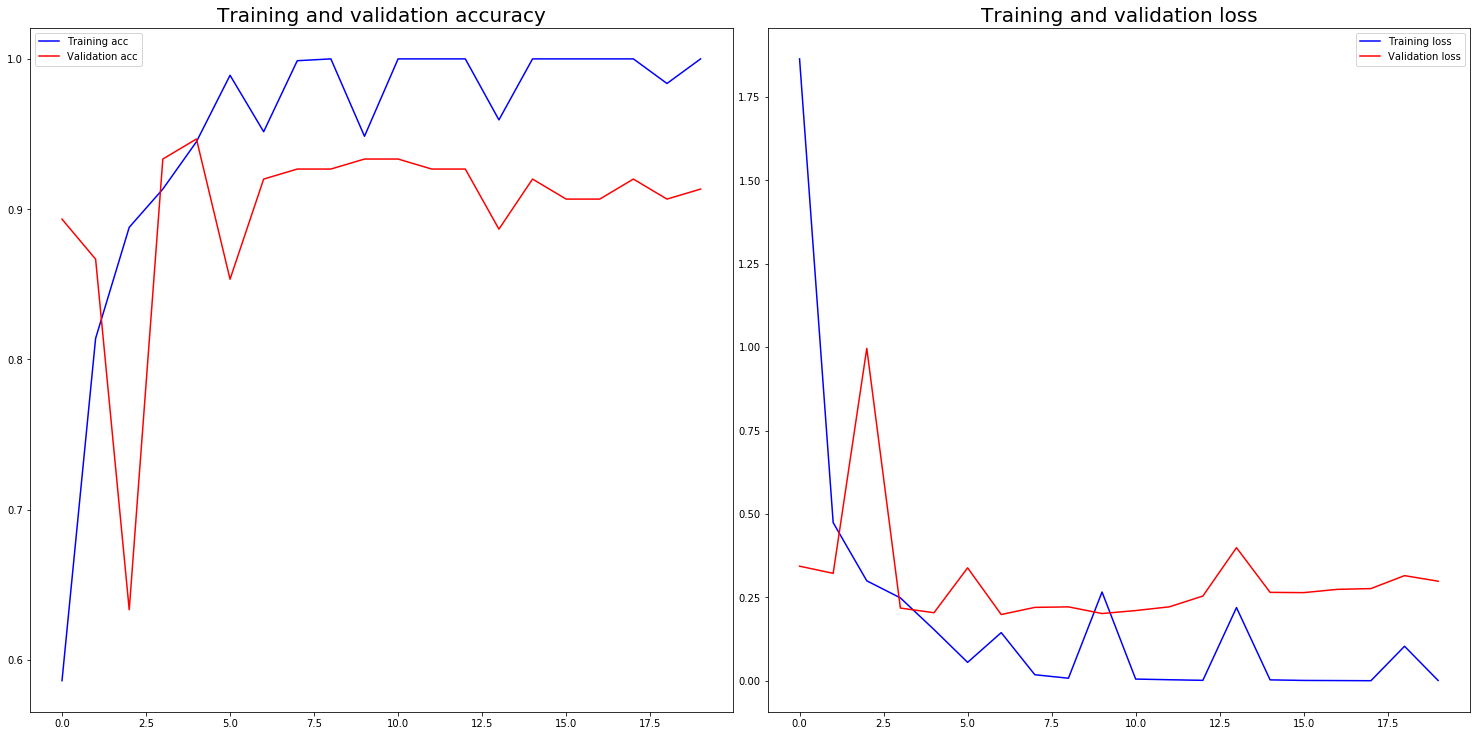

In [9]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, wspace=0.05, hspace=0)
plt.subplot(121)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.legend(prop={'size': 10})
plt.subplot(122)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.legend(prop={'size': 10})

plt.show()

15/15 [==============================] - 2s 134ms/step
No of errors = 39/150


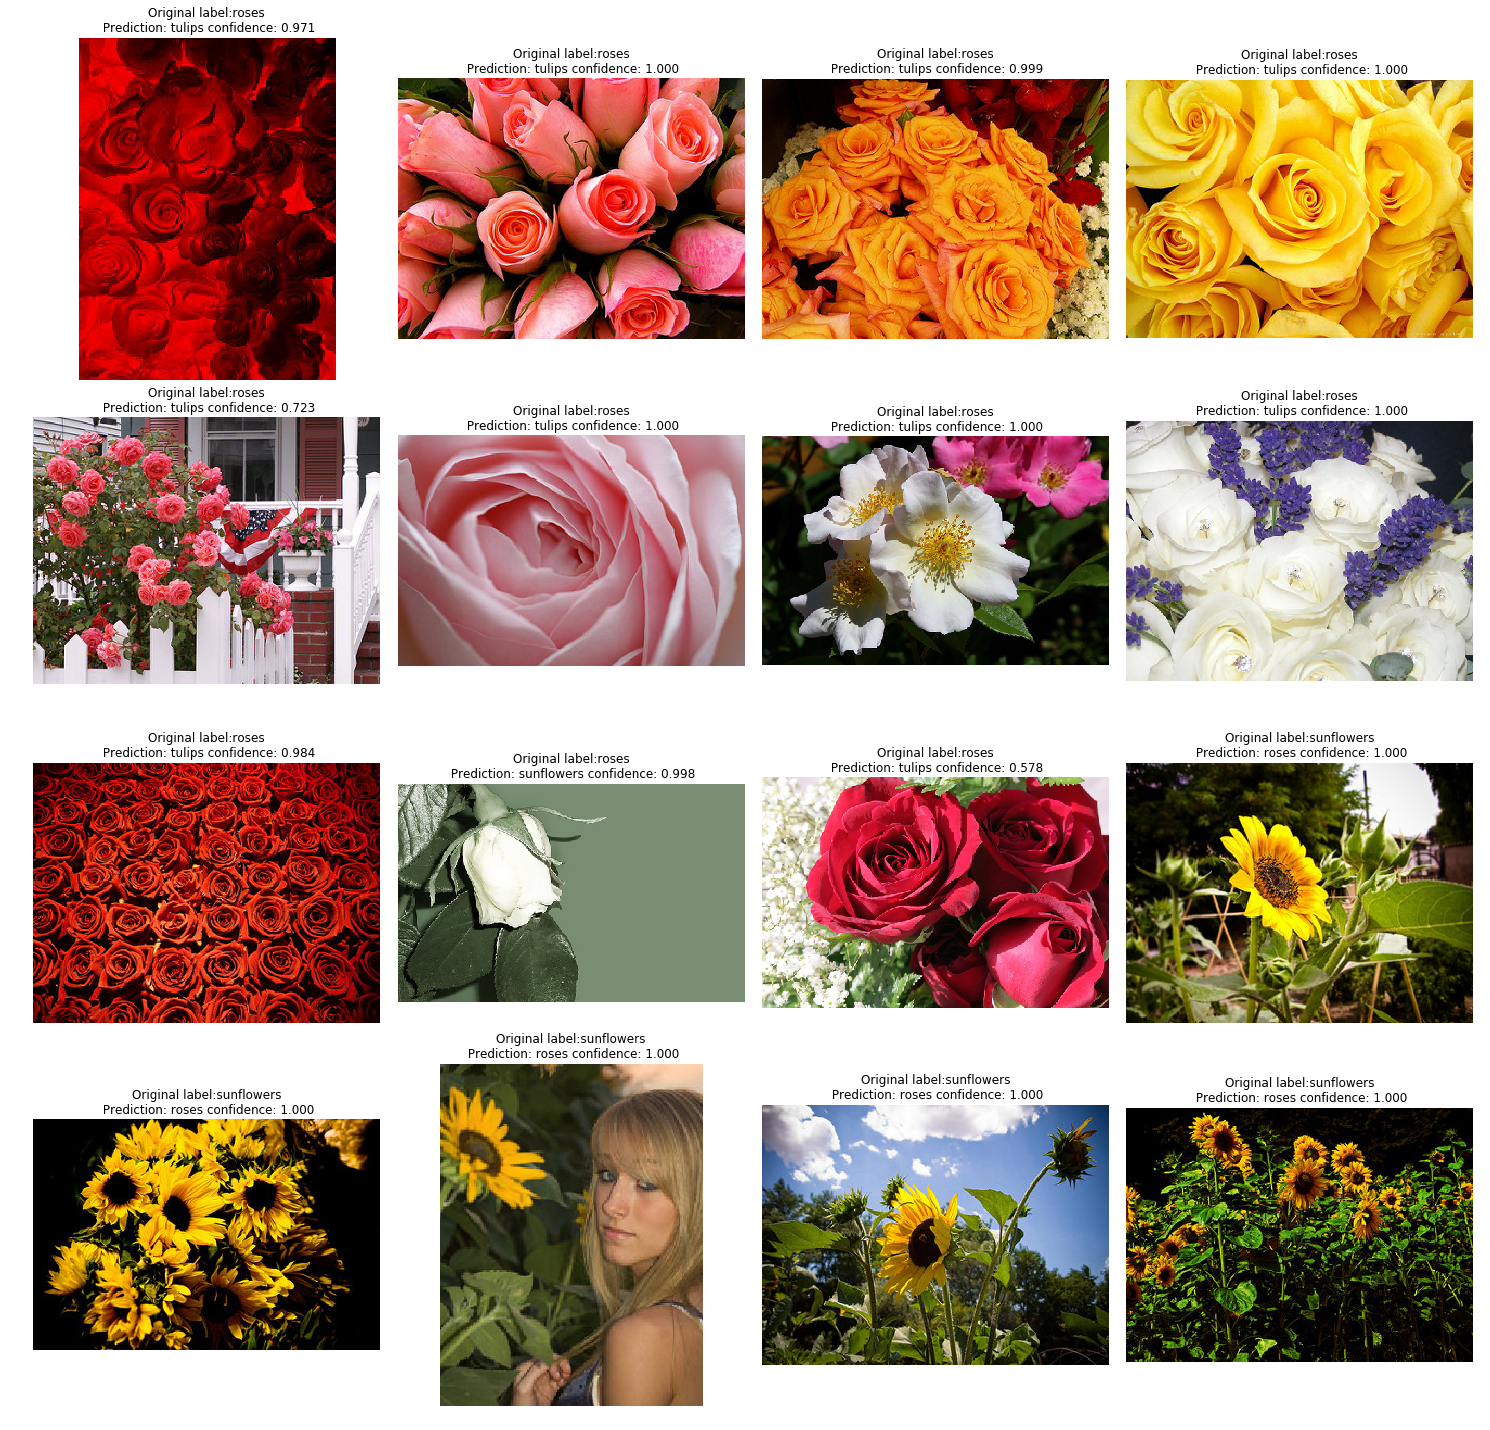

In [13]:
# Get the filenames from the generator
fnames = validation_generator.filenames

# Get the ground truth from generator
ground_truth = validation_generator.classes

# Get the label to class mapping from the generator
label2index = validation_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))


# Show the errors
plt.figure(figsize=[20,20])
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, wspace=0.05, hspace=0)
for i in range(len(errors[:16])):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
    
    title = 'Original label:{}\n Prediction: {} confidence: {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class], size=20)
    
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
plt.show()

In [46]:
#!pip3 install pydot-ng
#!apt-get  -y install graphviz 
import pydot_ng as pydot
from keras.utils import plot_model
plot_model(model, to_file='images/model.png')

### Hand Gesture Classification with deep learning 

In [ ]:
# TODO